# univariate polynomial regression
## Shaid Beheshti University
#### Ahmad Mahmoudi-Aznaveh
###### http://facultymembers.sbu.ac.ir/a_mahmoudi/index.html

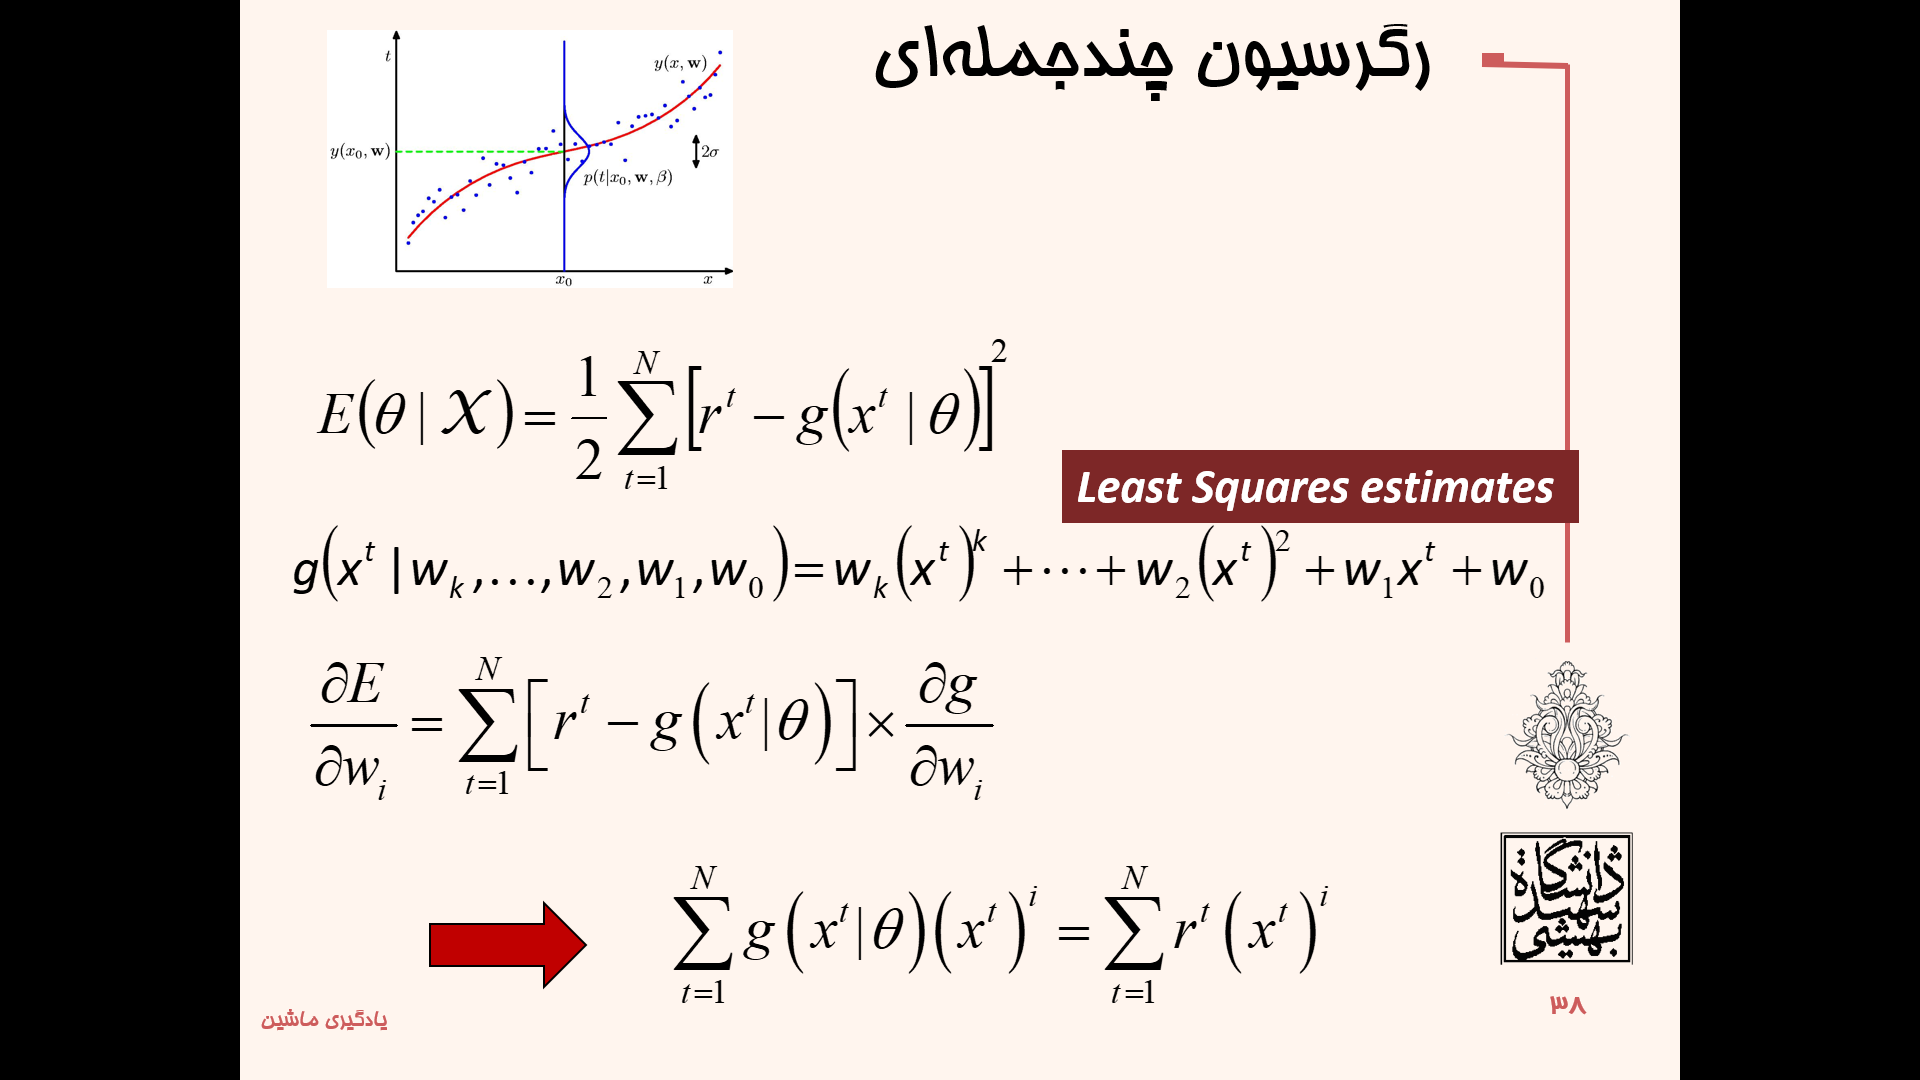

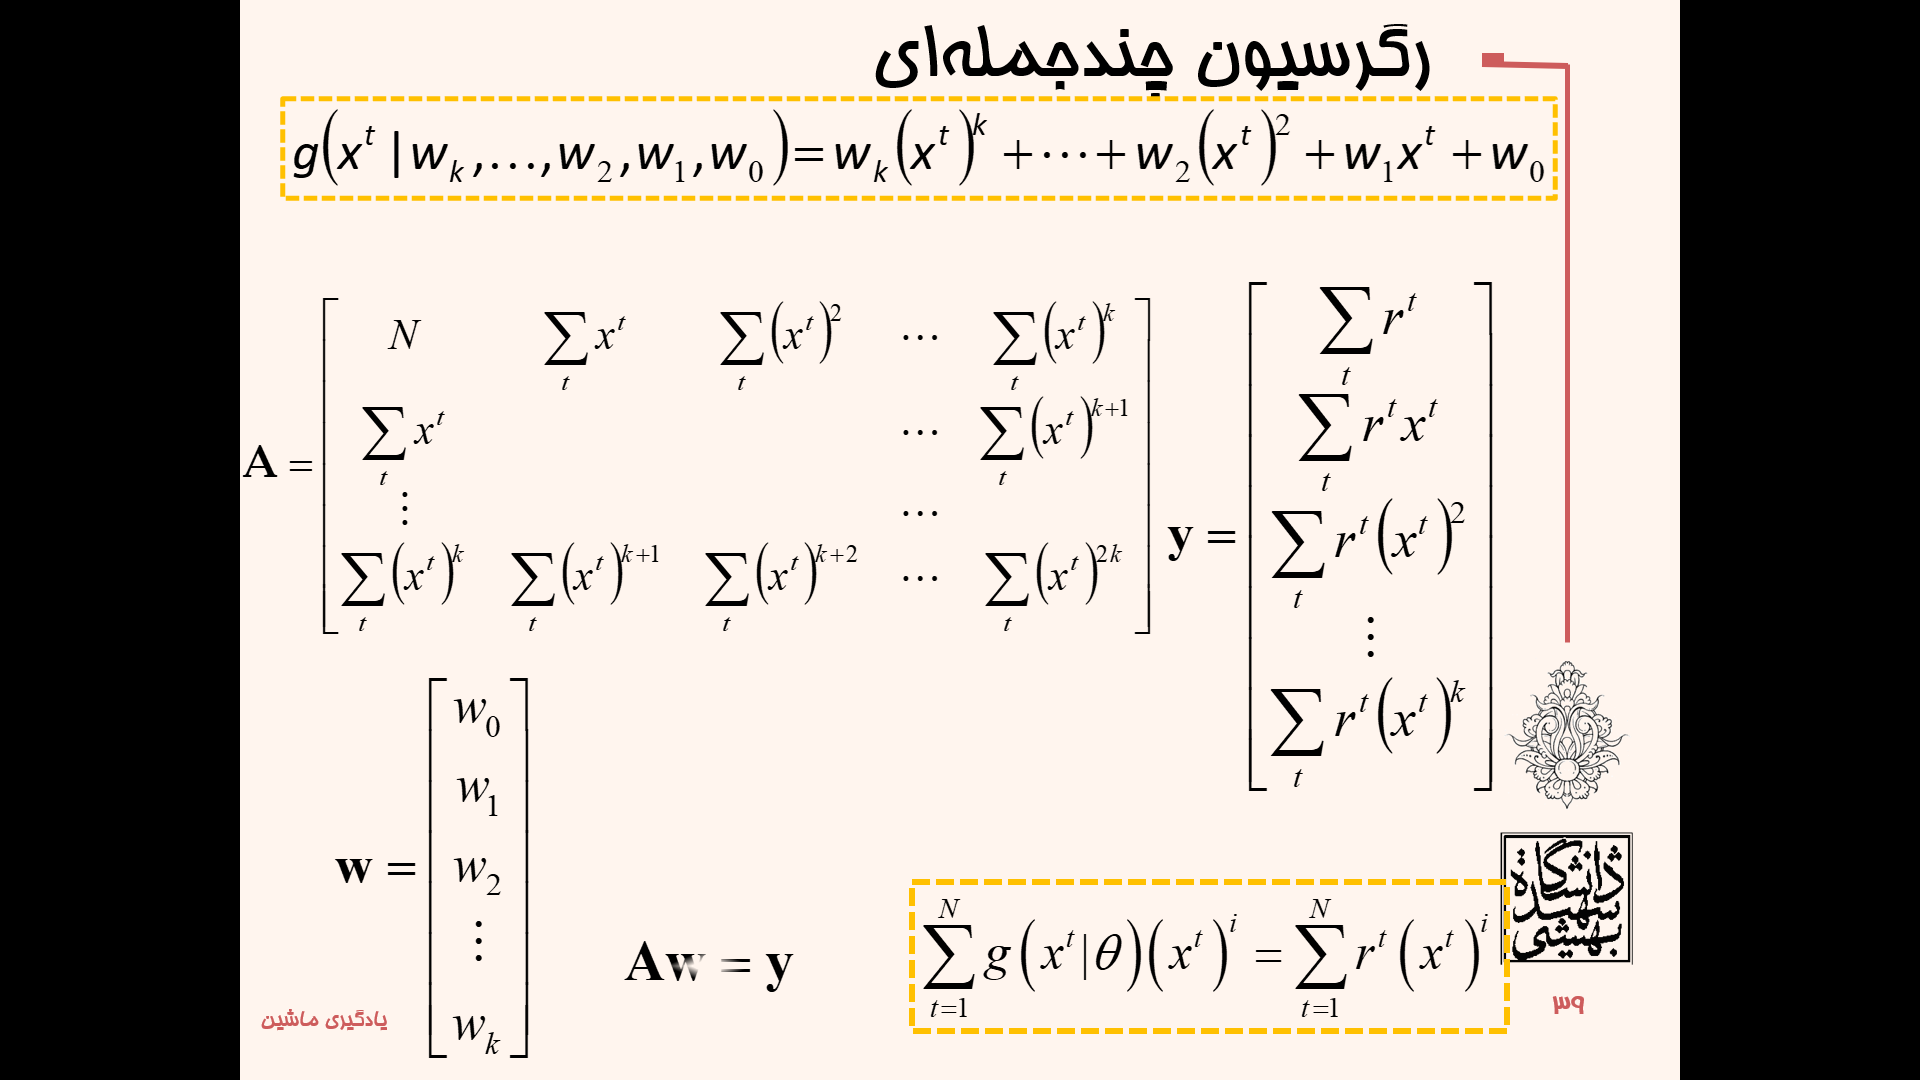

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

NOT=10    #Number Of Training
NOS=100   #Number Of Samples
lb=0      #lower bound
ub=1      #upper bound
x = np.linspace(lb, ub,num=NOS)

In [ ]:
poly = np.poly1d([3, 4, 1, 0])
y = poly(x)
x1 = (np.random.random(NOT)-0.5)*(ub-lb)
r1= poly(x1)+(np.random.random(NOT)-0.5)*2

In [2]:
#x = np.arange(0, 1, 0.01);
y = np.sin(2*math.pi*x)
x1 = np.random.random(NOT);
r1=np.sin(2*math.pi*x1)+(np.random.random(NOT)-0.5)*0.5;

(0.0, 1.0, -1.0, 1.0)

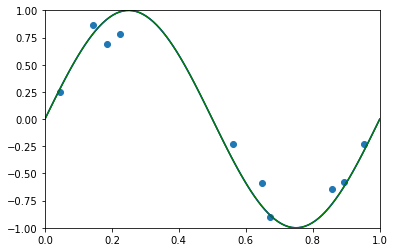

In [3]:
plt.plot(x1, r1, "o",x, y,'b')
plt.plot(x, y,'g')
plt.axis([lb, ub, -ub, ub])

# Poynomial regression

$$ A=DD^T $$

$$ W=(D^TD)^{-1}D^Tr $$


In [4]:
degree=12;
#creating DT
DT=np.ones(NOT);
x_tmp=x1
for k in range(1,degree+1):
    DT=np.vstack([DT, x_tmp])
    x_tmp=np.multiply(x_tmp, x1)    
D=np.transpose(DT);

DTDI=np.linalg.inv(np.matmul(DT, D))
DTDIDT=np.matmul(DTDI, DT)
Wr=np.matmul(DTDIDT, r1)
W=np.flipud(Wr)
print(W)

[ 2.63540699e+05 -1.05710831e+06  1.61491788e+06 -9.98370616e+05
 -1.59277943e+05  7.00883496e+05 -5.65241643e+05  2.76500049e+05
 -9.55348147e+04  2.28395968e+04 -3.37701178e+03  2.52995805e+02
 -4.74357464e+00]


(0.0, 1.0, -1.0, 1.0)

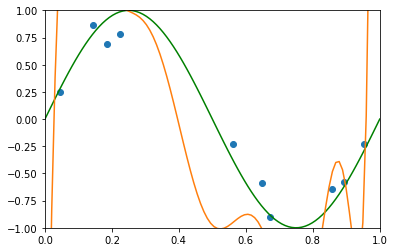

In [7]:
plt.plot(x1, r1, "o",x, y,'g')
poly = np.poly1d(W)
yp = poly(x)
plt.plot(x, yp)
plt.axis([lb, ub, -ub, ub])

# L2 Norm Regularization

$$ A=DD^T $$

$$ W=(D^TD+λI)^{-1}D^Tr $$


In [8]:
degree=12;

λ=0.1;
#creating DT
DT=np.ones(NOT);
x_tmp=x1
for k in range(1,degree+1):
    DT=np.vstack([DT, x_tmp])
    x_tmp=np.multiply(x_tmp, x1)
    
D=np.transpose(DT);

DTDI=np.linalg.inv(np.matmul(DT, D)+λ*np.eye(degree+1))
DTDIDT=np.matmul(DTDI, DT)
Wr=np.matmul(DTDIDT, r1)
W=np.flipud(Wr)
print(W)

[ 0.33225715  0.34831213  0.35861423  0.35869627  0.3416557   0.29693858
  0.20862611  0.05341281 -0.19969251 -0.57599953 -1.00636142 -0.91700794
  0.69803084]


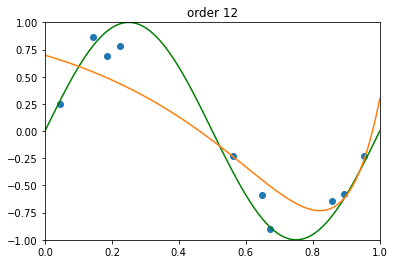

In [9]:
plt.plot(x1, r1, "o",x, y,'g')
poly = np.poly1d(W)
yp = poly(x)
plt.plot(x, yp)

plt.axis([lb, ub, -ub, ub])
plt.title("order "+str(degree))   
plt.savefig("Chp03_regulariztion_c.jpg")

# Polynomial regression using sklearn

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
x1_p = poly.fit_transform(x1.reshape(NOT,1))
print(x1)
print(x1_p)

[0.56177338 0.89322205 0.85866314 0.22361572 0.14325911 0.18665894
 0.95303166 0.04382358 0.6726571  0.64858422]
[[1.         0.56177338 0.31558933]
 [1.         0.89322205 0.79784564]
 [1.         0.85866314 0.73730239]
 [1.         0.22361572 0.05000399]
 [1.         0.14325911 0.02052317]
 [1.         0.18665894 0.03484156]
 [1.         0.95303166 0.90826934]
 [1.         0.04382358 0.00192051]
 [1.         0.6726571  0.45246758]
 [1.         0.64858422 0.4206615 ]]


(0.0, 1.0, -1.0, 1.0)

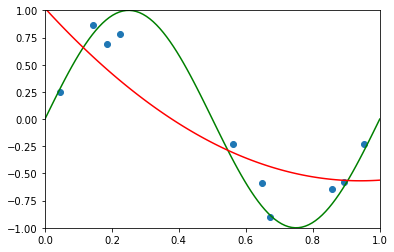

In [11]:
lreg = LinearRegression()
lreg.fit(x1_p,r1)
plt.plot(x1, r1, "o",x, y,'g')
plt.plot(x, lreg.predict(poly.fit_transform(x.reshape(NOS,1))),'r')
plt.axis([lb, ub, -ub, ub])

# Building a Machine Learning Pipeline with Scikit-Learn

(0.0, 1.0, -1.0, 1.0)

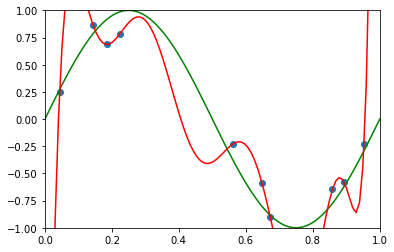

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x1.reshape(NOT,1),r1)

plt.plot(x1, r1, "o",x, y,'g')
plt.plot(x, polyreg.predict(x.reshape(NOS,1)),'r')
plt.axis([lb, ub, -ub, ub])

# L2 Norm  Regularization: Ridge

(0.0, 1.0, -1.0, 1.0)

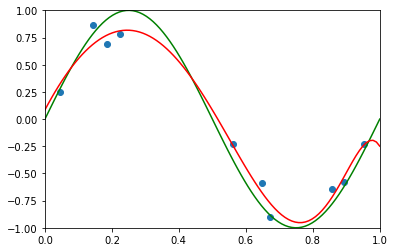

In [17]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
polyreg=make_pipeline(PolynomialFeatures(degree=12),Ridge(0.0001))
polyreg.fit(x1.reshape(NOT,1),r1)

plt.plot(x1, r1, "o",x, y,'g')
plt.plot(x, polyreg.predict(x.reshape(NOS,1)),'r')
plt.axis([lb, ub, -ub, ub])

# L1 Norm Regularization: Lasso
    (least absolute shrinkage and selection operator)

(0.0, 1.0, -1.0, 1.0)

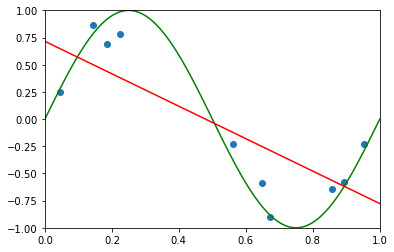

In [23]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
polyreg=make_pipeline(PolynomialFeatures(degree=3),Lasso(0.01))
polyreg.fit(x1.reshape(NOT,1),r1)

plt.plot(x1, r1, "o",x, y,'g')
plt.plot(x, polyreg.predict(x.reshape(NOS,1)),'r')
plt.axis([lb, ub, -ub, ub])